## Plot Spark and Kafka startup times

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('rp-streaming_startup.csv', skipinitialspace=True)

In [153]:
data = data.sort_values(by='nodes')
data

,Spark download,Spark startup,kafka download,kafka startup,nodes,system
0,8.098390,18.277243,3.108133,0.070536,2,stampede
1,9.125283,19.306798,2.492341,0.070543,2,stampede
6,10.876481,19.074302,2.615791,0.070538,2,stampede
2,9.039998,19.592994,2.694539,0.118231,4,stampede
7,11.905472,17.422300,2.641349,0.112357,4,stampede
8,9.632933,17.794380,2.524638,0.109197,4,stampede
3,10.815126,18.519438,2.563526,0.213992,8,stampede
4,10.831146,18.891010,2.428749,0.216599,8,stampede
5,9.098822,18.795048,2.693121,0.213992,8,stampede
9,16.535883,19.734709,2.713063,0.400925,16,stampede


In [155]:
spark_download_group = data.groupby(['nodes','Spark download']).mean()

spark_download_group
data.groupby(['nodes']).mean()
#data.groupby(['nodes']).std()

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,9.366718,18.886114,2.738755,0.070539
4,10.192801,18.269891,2.620175,0.113262
8,10.248365,18.735165,2.561799,0.214861
16,12.692423,19.857494,2.608371,0.402541


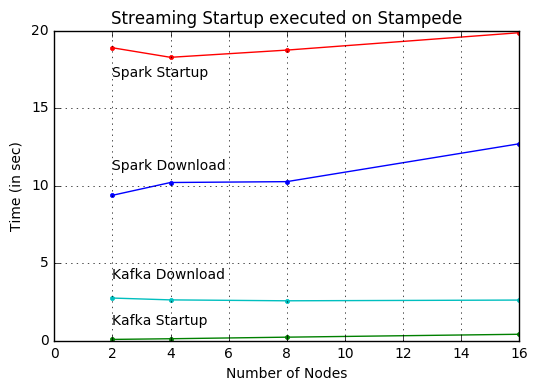

In [161]:
nodes_group = data.groupby(['nodes']).mean()
ax = nodes_group.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Stampede', 
                      legend=None,
                      xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.'
                      )
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),
            )
ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),
            )
ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 17),
            )
ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),
            )
ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')